# Code Written by Mohit (23013354), Ashik (23046112), Sayantani (23026142), Viranaya (22994993)
# Based on notebooks/indicators.ipynb

In [21]:
import sys

sys.path.append("../")
from src.finance_ml.indicators.indicators import Indicators
from src.finance_ml.data_preparation.data_preparation import DataLoader

from IPython.display import display

In [22]:
dataloader = DataLoader(
    time_index_col="DATE",
    keep_cols=["VOLUME", "OPEN", "HIGHT", "LOW", "CLOSE", "VW", "TRANSACTIONS"],
)
ticker = "APPL"
fname = "equities/FB_2020-04-07_2022-04-06.parquet"
N = 200
df = dataloader.load_dataset({ticker: "../data/" + fname}).iloc[:N]
display(df)

,APPL_VOLUME,APPL_OPEN,APPL_HIGHT,APPL_LOW,APPL_CLOSE,APPL_VW,APPL_TRANSACTIONS
DATE,,,,,,,
2020-04-07 15:41:00,49517.0,169.7050,169.8200,169.5811,169.700,169.7005,450
2020-04-07 15:42:00,38624.0,169.6700,169.8105,169.6200,169.740,169.7052,456
2020-04-07 15:43:00,24795.0,169.7200,169.8050,169.5700,169.570,169.6920,348
2020-04-07 15:44:00,33196.0,169.5500,169.5500,169.3900,169.410,169.4669,433
2020-04-07 15:45:00,67190.0,169.3900,169.4800,168.9700,169.050,169.2253,650
...,...,...,...,...,...,...,...
2020-04-07 18:56:00,103549.0,167.7200,168.1800,167.7100,168.170,167.9256,524
2020-04-07 18:57:00,44672.0,168.1610,168.3300,168.1610,168.190,168.2474,426
2020-04-07 18:58:00,33642.0,168.2027,168.2300,168.0000,168.065,168.0721,399


In [23]:
# Columns of indicators with default parameters
data_cols = ["DATE", "OPEN", "HIGHT", "LOW", "CLOSE", "VW", "VOLUME"]

var_cols = [
    "OPEN",
    "HIGHT",
    "LOW",
    "CLOSE",
    "VW",
    "VOLUME",
    "TRANSACTIONS",
    "DPO_w20",
    "EMA_w14",
    "SMA_w14",
    "WMA_w09",
    "MACD_w(26,12,09)",
    "MACDD_w(26,12,09)",
    "MACDS_w(26,12,09)",
    "PSAR_s(0.02,0.2)",
    "PSARD_s(0.02,0.2)",
    "PSARDI_s(0.02,0.2)",
    "PSARU_s(0.02,0.2)",
    "PSARUI_s(0.02,0.2)",
]

# For each of calculated column, we add the ticker code, as standardized by class 𝙳𝚊𝚝𝚊𝙻𝚘𝚊𝚍𝚎𝚛
var_cols = [ticker + "_" + col for col in var_cols]
norm_cols = [col + "_norm" for col in var_cols]

In [24]:
# Process data normalization
norm_data = True

trend_indicators_ind_list = [
    "SMA",  # Simple Moving Average
    "WMA",  # Weighted Moving Average
    "EMA",  # Exponential Moving Average
    "MACD",  # Moving Average Convergence Divergence
    "DPO",  # Detrended Price Oscillator
    "PSAR",  # Parabolic Stop and Reverse
]

# Select Indicator transformer
ind_processor = Indicators(
    ticker=ticker,
    norm_data=norm_data,
    calc_all=False,
    list_ind=trend_indicators_ind_list,
)

# Calculate Indicators over input dataframe
df = ind_processor.fit_transform(df)

if norm_data:
    df_norm = ind_processor.data_norm

In [25]:
# Display dataframe with Indicators
display(df[var_cols].dropna(axis=0))

,APPL_OPEN,APPL_HIGHT,APPL_LOW,APPL_CLOSE,APPL_VW,APPL_VOLUME,APPL_TRANSACTIONS,APPL_DPO_w20,APPL_EMA_w14,APPL_SMA_w14,APPL_WMA_w09,"APPL_MACD_w(26,12,09)","APPL_MACDD_w(26,12,09)","APPL_MACDS_w(26,12,09)","APPL_PSAR_s(0.02,0.2)","APPL_PSARD_s(0.02,0.2)","APPL_PSARDI_s(0.02,0.2)","APPL_PSARU_s(0.02,0.2)","APPL_PSARUI_s(0.02,0.2)"
DATE,,,,,,,,,,,,,,,,,,,
2020-04-07 16:14:00,170.9100,171.0700,170.8898,171.0673,170.9541,88547.0,742,-0.283660,170.629927,170.629950,170.951424,0.390206,0.042770,0.347436,170.797291,169.527700,0.0,170.797291,0.0
2020-04-07 16:15:00,171.0650,171.2700,171.0500,171.0800,171.1518,65448.0,705,-0.294160,170.689937,170.708521,170.984013,0.391458,0.035217,0.356241,170.830000,169.527700,0.0,170.830000,0.0
2020-04-07 16:16:00,171.0782,171.3500,171.0782,171.3000,171.2206,65652.0,662,-0.110860,170.771279,170.794236,171.051936,0.405528,0.039430,0.366098,170.889800,169.527700,0.0,170.889800,0.0
2020-04-07 16:17:00,171.3100,171.4104,170.9400,170.9400,171.3018,78846.0,683,0.130535,170.793775,170.860664,171.038596,0.383212,0.013691,0.369521,171.350000,171.350000,1.0,170.889800,0.0
2020-04-07 16:18:00,170.9500,171.0400,170.6700,170.9000,170.8670,57554.0,794,0.248735,170.807938,170.917807,171.016589,0.358169,-0.009081,0.367250,171.350000,171.350000,0.0,170.889800,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-07 18:56:00,167.7200,168.1800,167.7100,168.1700,167.9256,103549.0,524,-0.202005,168.034173,167.932150,167.945778,-0.273546,0.047567,-0.321113,167.430000,168.190908,0.0,167.430000,1.0
2020-04-07 18:57:00,168.1610,168.3300,168.1610,168.1900,168.2474,44672.0,426,0.060895,168.054950,167.953921,167.989222,-0.238266,0.066278,-0.304544,167.445000,168.190908,0.0,167.445000,0.0
2020-04-07 18:58:00,168.2027,168.2300,168.0000,168.0650,168.0721,33642.0,399,-0.064755,168.056290,167.989993,168.004333,-0.217882,0.069330,-0.287212,167.480400,168.190908,0.0,167.480400,0.0


In [26]:
if norm_data:
    display(df_norm[norm_cols].dropna(axis=0))

,APPL_OPEN_norm,APPL_HIGHT_norm,APPL_LOW_norm,APPL_CLOSE_norm,APPL_VW_norm,APPL_VOLUME_norm,APPL_TRANSACTIONS_norm,APPL_DPO_w20_norm,APPL_EMA_w14_norm,APPL_SMA_w14_norm,APPL_WMA_w09_norm,"APPL_MACD_w(26,12,09)_norm","APPL_MACDD_w(26,12,09)_norm","APPL_MACDS_w(26,12,09)_norm","APPL_PSAR_s(0.02,0.2)_norm","APPL_PSARD_s(0.02,0.2)_norm","APPL_PSARDI_s(0.02,0.2)_norm","APPL_PSARU_s(0.02,0.2)_norm","APPL_PSARUI_s(0.02,0.2)_norm"
DATE,,,,,,,,,,,,,,,,,,,
2020-04-07 16:14:00,0.458107,0.491655,0.520791,0.526572,0.496812,-0.361221,0.031835,-0.529093,0.346870,0.350797,0.495021,0.964055,0.395590,0.941187,0.411862,-0.333120,-1.0,0.513320,-1.0
2020-04-07 16:15:00,0.525571,0.581628,0.591209,0.532100,0.585586,-0.562736,-0.037453,-0.546293,0.377758,0.389925,0.510993,0.966992,0.346419,0.964634,0.425577,-0.333120,-1.0,0.528020,-1.0
2020-04-07 16:16:00,0.531317,0.617617,0.603604,0.627856,0.616480,-0.560957,-0.117978,-0.246043,0.419628,0.432611,0.544282,1.000000,0.373843,0.990885,0.450650,-0.333120,-1.0,0.554895,-1.0
2020-04-07 16:17:00,0.632209,0.644788,0.542857,0.471164,0.652941,-0.445852,-0.078652,0.149367,0.431207,0.465692,0.537744,0.947645,0.206268,1.000000,0.643606,0.575964,1.0,0.554895,-1.0
2020-04-07 16:18:00,0.475517,0.478159,0.424176,0.453754,0.457701,-0.631604,0.129213,0.342981,0.438497,0.494149,0.526958,0.888896,0.058010,0.993954,0.643606,0.575964,-1.0,0.554895,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-07 18:56:00,-0.930359,-0.808448,-0.876923,-0.734494,-0.863089,-0.230344,-0.376404,-0.395341,-0.989244,-0.992708,-0.978054,-0.593134,0.426825,-0.839237,-1.000000,-1.000000,-1.0,-1.000000,1.0
2020-04-07 18:57:00,-0.738411,-0.740969,-0.678681,-0.725789,-0.718590,-0.743986,-0.559925,0.035295,-0.978549,-0.981866,-0.956762,-0.510366,0.548639,-0.795110,-0.993711,-1.000000,-1.0,-0.993259,-1.0
2020-04-07 18:58:00,-0.720261,-0.785955,-0.749451,-0.780196,-0.797306,-0.840211,-0.610487,-0.170522,-0.977860,-0.963902,-0.949356,-0.462544,0.568510,-0.748952,-0.978868,-1.000000,-1.0,-0.977349,-1.0


<Axes: xlabel='DATE'>

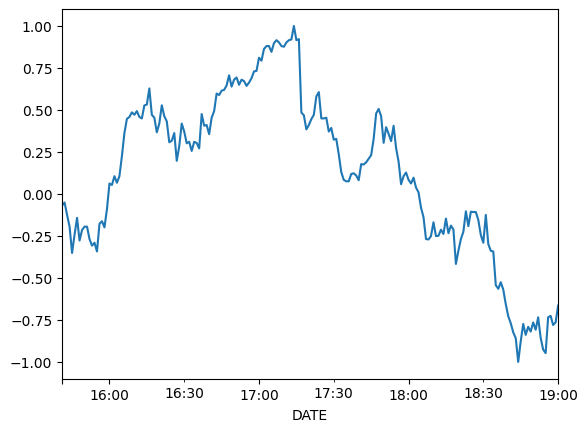

In [27]:
# df.plot(kind="line")
df1 = df_norm.APPL_CLOSE_norm
df1.plot(kind="line")

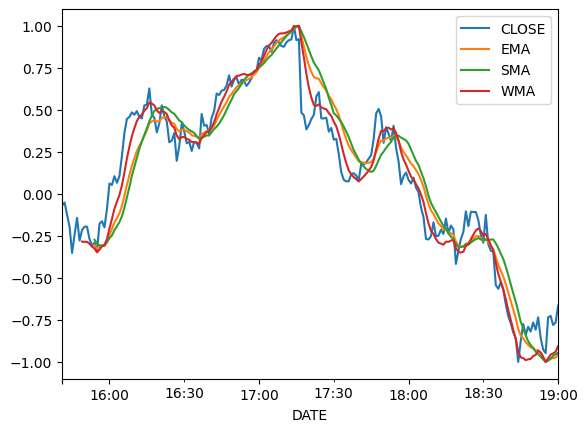

In [28]:
from matplotlib import pyplot as plt


df2_ema = df_norm["APPL_EMA_w14_norm"]
df2_sma = df_norm["APPL_SMA_w14_norm"]
df2_wma = df_norm["APPL_WMA_w09_norm"]

df1.plot(kind="line")
df2_ema.plot(kind="line")
df2_sma.plot(kind="line")
df2_wma.plot(kind="line")
plt.legend(["CLOSE", "EMA", "SMA", "WMA"])

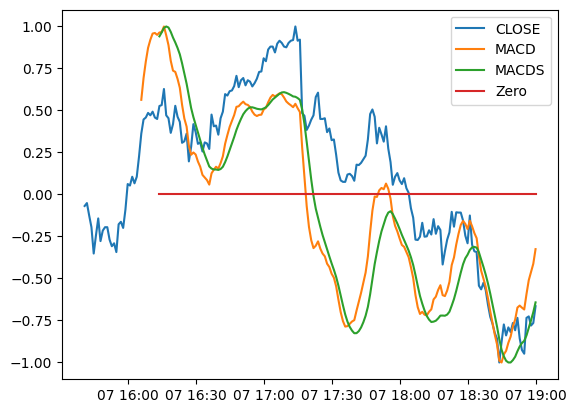

In [29]:
from matplotlib import pyplot as plt


df2_MACD = df_norm["APPL_MACD_w(26,12,09)_norm"]
df2_MACDD = df_norm["APPL_MACDD_w(26,12,09)_norm"]
df2_MACDS = df_norm["APPL_MACDS_w(26,12,09)_norm"]

plt.plot(df1, label="CLOSE")
plt.plot(df2_MACD, label="MACD")
plt.plot(df2_MACDS, label="MACDS")
# show 0 line for MACDD
plt.plot(df2_MACDD * 0, label="Zero")
plt.legend()

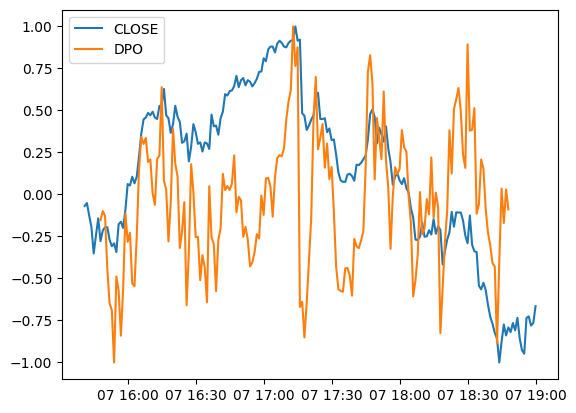

In [35]:
# plot DPO with a left shift of 12 mins to align the peaks and troughs
df2_DPO = df_norm["APPL_DPO_w20_norm"]
plt.plot(df1, label="CLOSE")
plt.plot(df2_DPO.shift(-12), label="DPO")
plt.legend()

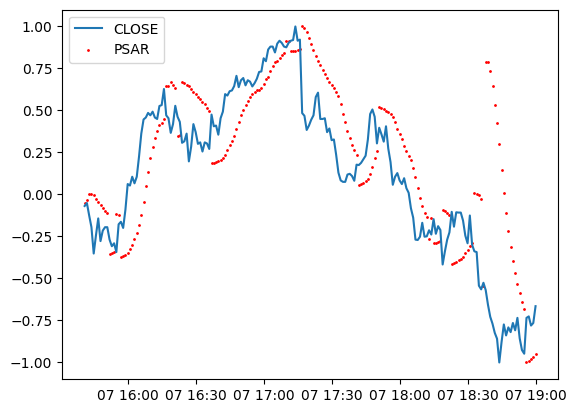

In [31]:
# plot the PSAR values
df2_PSAR = df_norm["APPL_PSAR_s(0.02,0.2)_norm"]
plt.plot(df1, label="CLOSE")
plt.scatter(df2_PSAR.index, df2_PSAR, label="PSAR", color="red", s=1)
plt.legend()